# 29. split-apply-combine explained

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
titanic = pd.read_csv("titanic.csv")

In [5]:
titanic_slice = titanic.iloc[:10, [2,3]]

In [6]:
titanic_slice

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [7]:
list(titanic_slice.groupby("sex"))[0][1]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [8]:
list(titanic_slice.groupby("sex"))[1][1]

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


In [9]:
titanic_slice.groupby("sex").mean() #split(groupby) , apply(mean()) , combine to new dataframe

,age
sex,
female,28.00
male,28.25


In [10]:
titanic.groupby("sex").survived.sum() #only survived column that makes sense

sex
female    233
male      109
Name: survived, dtype: int64

In [11]:
titanic.groupby("sex")[["fare","age"]].max()

,fare,age
sex,,
female,512.3292,63.0
male,512.3292,80.0


In [12]:
new_df = titanic.groupby("sex").mean()

In [13]:
new_df

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [14]:
%matplotlib inline
plt.style.use("seaborn")

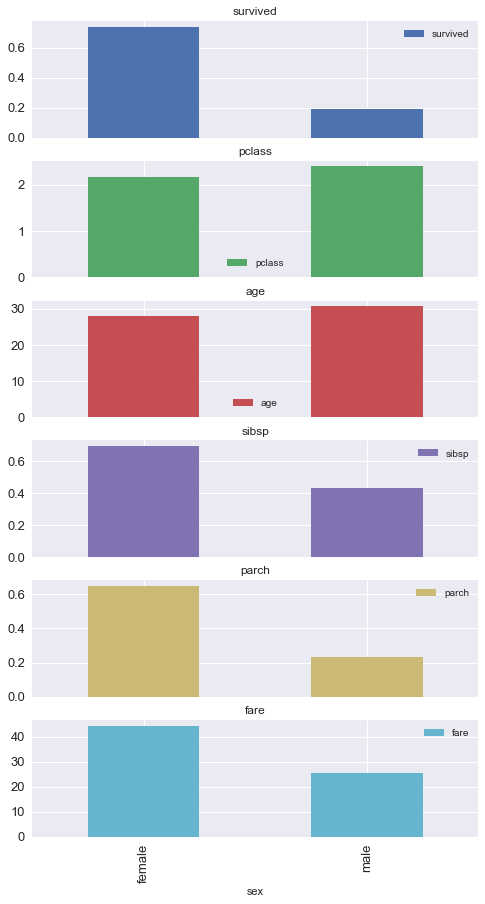

In [15]:
new_df.plot(kind = "bar", subplots = True, figsize = (8,15), fontsize = 13)
plt.show()

# 30. split-apply-combine applied

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
summer = pd.read_csv("summer.csv")

In [18]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [19]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [20]:
medals_per_country = summer.groupby("Country").Medal.count().nlargest(n = 20) #count() non null values
medals_per_country

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
ROU     640
NOR     554
KOR     529
POL     511
DEN     507
Name: Medal, dtype: int64

In [21]:
%matplotlib inline
plt.style.use("seaborn")

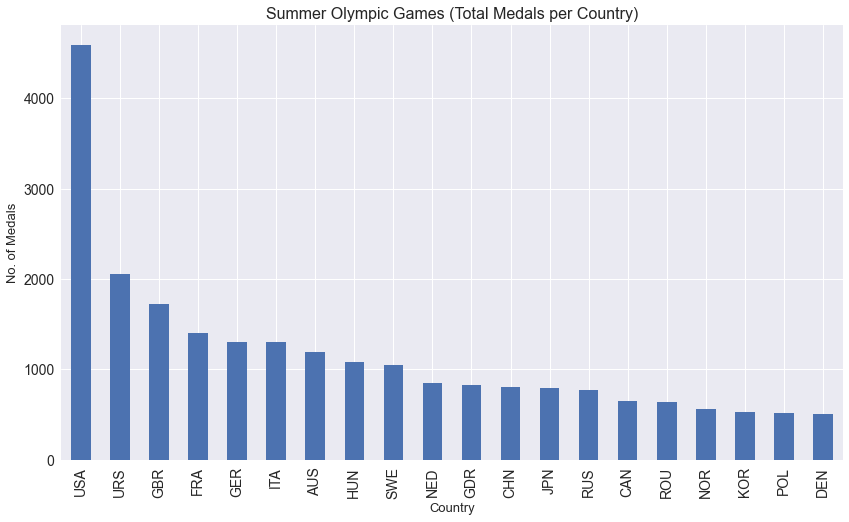

In [22]:
medals_per_country.plot(kind = "bar", figsize = (14,8), fontsize = 14)
plt.xlabel("Country", fontsize = 13)
plt.ylabel("No. of Medals", fontsize = 13)
plt.title("Summer Olympic Games (Total Medals per Country)", fontsize = 16)
plt.show()

In [23]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [25]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
titanic.fare.mean()

32.204207968574636

In [27]:
titanic.groupby("pclass").fare.mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [28]:
titanic.survived.sum()

342

In [29]:
titanic.survived.mean()

0.3838383838383838

In [30]:
titanic.groupby("sex").survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [31]:
titanic.groupby("pclass").survived.mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [32]:
titanic["ad_chi"] = "adult"

In [33]:
titanic.loc[titanic.age < 18, "ad_chi"] = "child" #add child if <18 to ad_chi column

In [34]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult
1,1,1,female,38.0,1,0,71.2833,C,C,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,1,1,female,35.0,1,0,53.1000,S,C,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult


In [35]:
titanic.ad_chi.value_counts()

adult    778
child    113
Name: ad_chi, dtype: int64

In [36]:
titanic.groupby("ad_chi").survived.mean()

ad_chi
adult    0.361183
child    0.539823
Name: survived, dtype: float64

In [37]:
titanic.groupby(["sex","ad_chi"]).survived.count()

sex     ad_chi
female  adult     259
        child      55
male    adult     519
        child      58
Name: survived, dtype: int64

In [41]:
titanic.groupby(["sex","ad_chi"]).survived.mean().sort_values(ascending = False)

sex     ad_chi
female  adult     0.752896
        child     0.690909
male    child     0.396552
        adult     0.165703
Name: survived, dtype: float64

In [42]:
w_and_c_first = titanic.groupby(["sex","ad_chi"]).survived.mean().sort_values(ascending = False)

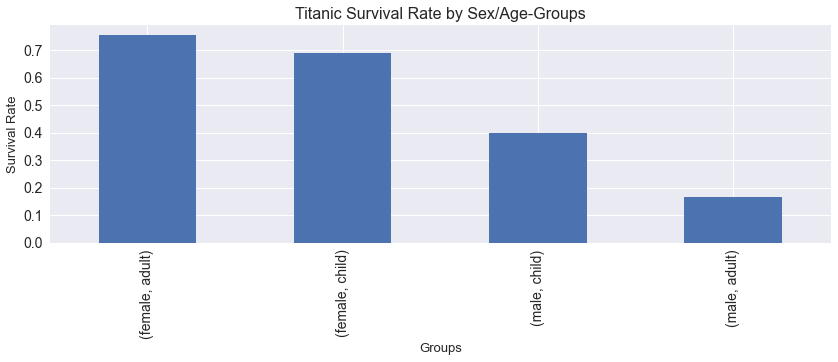

In [48]:
w_and_c_first.plot(kind = "bar", figsize = (14,4), fontsize = 14)
#plt.xticks(fontsize = 15)
#plt.yticks(fontsize = 13)
plt.xlabel("Groups", fontsize = 13)
plt.ylabel("Survival Rate", fontsize = 13)
plt.title("Titanic Survival Rate by Sex/Age-Groups", fontsize = 16)
plt.show()

In [46]:
titanic.groupby("sex")[["survived","pclass","age","fare"]].agg(["sum","mean"])

survived           pclass                 age                   fare  \
            sum      mean    sum      mean       sum       mean         sum   
sex                                                                           
female      233  0.742038    678  2.159236   7286.00  27.915709  13966.6628   
male        109  0.188908   1379  2.389948  13919.17  30.726645  14727.2865   

                   
             mean  
sex                
female  44.479818  
male    25.523893